<a href="https://colab.research.google.com/github/ErnestoFCh/Simulacion-I/blob/main/Aceptacion_Rechazo_Simu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a=190
b=210
c=230

##Resolver por aceptacion y rechazo

$$f(x)=\left\{\begin{matrix}
\frac{2(x-a)}{(c-a)(b-a)} &si \quad a\leq x\leq b \\
 -\frac{2(x-c)}{(c-a)(c-b)}& si \quad b\leq x\leq c
\end{matrix}\right.$$

Sabemos tambien que su distribucion acumulada es:
$$F(x)=\left\{\begin{matrix}
\frac{(x-a)^2}{(b-a)(c-a)} & si \quad a\leq x\leq b \\
 1-\frac{(x-c)^2}{(c-a)(c-b)}&si \quad b\leq x\leq c
\end{matrix}\right.$$

Resolvemos: aqui $\quad C=\frac{2}{c-a}$
1. Generamos $R_1$ y $R_2$
2. Calculamos: $x= α + (β - α)R_1=a + (c - a)R_1$
3. Es $x<b$:
   
   Afirmativo:
$$f(x)=\frac{2(x-a)}{(c-a)(b-a)}=\frac{2(a+(c-a)R_1-a)}{(c-a)(b-a)}=\frac{2R_1}{b-a}$$
  Caso contrario:
  $$f(x)=-\frac{2(x-c)}{(c-a)(c-b)}=-\frac{2(a+(c-a)R_1-c)}{(c-a)(c-b)}=\frac{2(1-R_1)}{c-b}$$

4. Si: $R_2<\frac{f(x)}{\frac{2}{c-a}}=\frac{f(x)(c-a)}{2}$
  
  entonces $x$ es un valor simulado de lo contrario regresamos al paso 1

### Grafica f.d.p

In [20]:
def f(x,a,b,c):
  if a<=x<=b:
    return (2*(x-a))/((b-a)*(c-a))
  elif b<=x<=c:
    return -(2*(x-c))/((c-a)*(c-b))
  elif x==b:
    return 2/(c-a)


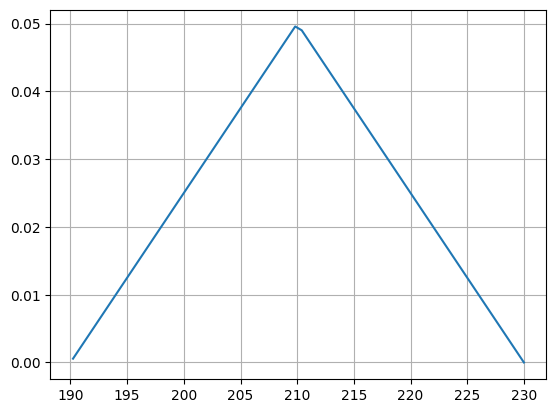

In [21]:
X=np.linspace(0, c, 400) #Generamos numeros aleatorios
Y=[f(x,a,b,c) for x in X]      #Evaluamos los numeros aleatorios generados

plt.plot(X,Y)
plt.grid(True)  # Mallamos la grafica

plt.show()

###Grafica acumulada

In [25]:
def F(x,a,b,c):
  if a<=x<=b:
    return (x-a)**2/((b-a)*(c-a))
  elif b<=x<=c:
    return 1-(x-c)**2/((c-a)*(c-b))


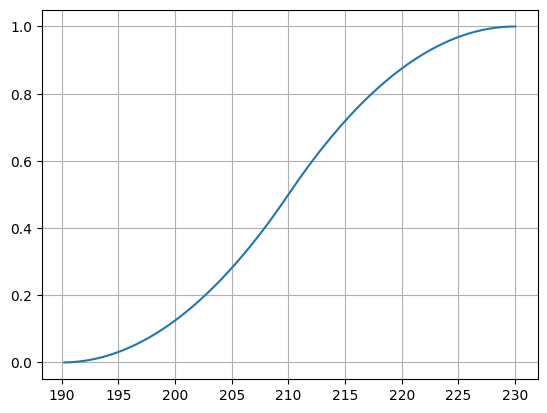

In [27]:
X=np.linspace(0, c, 400)
Y=[F(x,a,b,c) for x in X]

plt.plot(X,Y)
plt.grid(True)
plt.show()

###Generamos $x$ simulado:

In [40]:
def sim(a,b,c):
  R1=np.random.rand()
  x=a+(c-a)*R1
  if x<b:
    return x, ((2*R1)/(b-a))
  else:
    return x, (2*(1-R2)/(c-b))

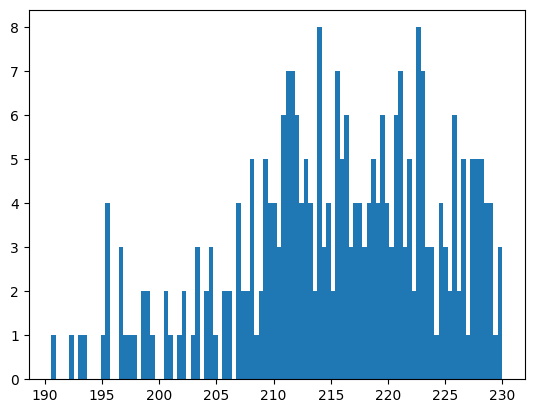

In [41]:
X=[]
for i in range(10000):
  R2=np.random.rand()
  x,f=sim(a,b,c)
  if R2<f/2:
    X.append(x)

plt.hist(X,bins=100)
plt.show()